In [1]:
library(wooldridge)
library(stargazer)
library(knitr)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [ ]:
pacman::p_load(wooldridge,stargazer,broom,tidyverse,ggplot2, lmtest, sandwich,
               dplyr,tidyr,moderndive,jtools,sjPlot,dotwhisker,FSA,readxl,texreg,
              car)

In [1]:
# install.packages("PoEdata")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Warning message:
“package ‘PoEdata’ is not available (for R version 3.5.1)”

In [2]:
# data("food",package="PoEdata") 
# mod1 <- lm(food_exp~income, data=food) 
# plot(food$income,food$food_exp, type="p", 
# 	xlab="income", ylab="food expenditure") 
# abline(mod1) 


ERROR: Error in find.package(package, lib.loc, verbose = verbose): there is no package called ‘PoEdata’



Basically you need the sandwich package, which computes robust covariance matrix estimators. You also need some way to use the variance estimator in a linear model, and the lmtest package is the solution. You will not get the same results as Stata, however, unless you use the HC1 estimator; the default is HC3, for reasons explained in ?vcovHC.


> library(lmtest)
> library(sandwich)
> coeftest(model, vcov = vcovHC(m, type="HC1"))


The main point is that the results are exactly the same. Interestingly, some of the robust standard errors are smaller than the model-based errors, and the effect of setting is now significant

## Example 8.1

After loading the data and generating the dummy variables from chapter 7 estimate the model in the already familiar way.


Chapter 8 - Heteroskedasticity

    Example 8.1: Log Wage Equation with Heteroscedasticity-Robust Standard Errors

use http://fmwww.bc.edu/ec-p/data/wooldridge/wage2

gen single=(~married)

gen male=(~female)

gen marrmale=male*married

gen marrfem=female*married

gen singfem=single*female

reg lwage marrmale marrfem singfem educ exper expersq tenure tenursq, robust


reg lwage marrmale marrfem singfem educ exper expersq tenure tenursq

In [3]:
data("wage1")

marrmale <- as.numeric(wage1$female == 0 & wage1$married == 1)
marrfem <- as.numeric(wage1$female == 1 & wage1$married == 1)
singfem <- as.numeric(wage1$female == 1 & wage1$married == 0)

lm.8.1 <- lm(lwage ~ marrmale + marrfem + singfem + educ + exper + expersq + tenure + tenursq, data = wage1)

summary(lm.8.1)


Call:
lm(formula = lwage ~ marrmale + marrfem + singfem + educ + exper + 
    expersq + tenure + tenursq, data = wage1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89697 -0.24060 -0.02689  0.23144  1.09197 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.3213781  0.1000090   3.213 0.001393 ** 
marrmale     0.2126757  0.0553572   3.842 0.000137 ***
marrfem     -0.1982676  0.0578355  -3.428 0.000656 ***
singfem     -0.1103502  0.0557421  -1.980 0.048272 *  
educ         0.0789103  0.0066945  11.787  < 2e-16 ***
exper        0.0268006  0.0052428   5.112 4.50e-07 ***
expersq     -0.0005352  0.0001104  -4.847 1.66e-06 ***
tenure       0.0290875  0.0067620   4.302 2.03e-05 ***
tenursq     -0.0005331  0.0002312  -2.306 0.021531 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3933 on 517 degrees of freedom
Multiple R-squared:  0.4609,	Adjusted R-squared:  0.4525 
F-statistic: 55.25 on 8 an

The function coeftest from the lmtest package can be used to obtain the heteroskedasticity robust standard errors. 

The first argument of the function contains the result of the original estimation, i.e. lm.8.1.. 

The second argument tells R how to calculate the heteroskedasticity robust standard errors. 

Basically, you could just enter the first part and R would do the rest. 

However, since the standard procedure of coeftest would not give the same results as in the book, we have to specify them a bit. 

Thus, we use the vcovHC function from the sandwich package, which requires the output of the estimated model and a specification of the type of robust standard errors that should be calculated. In our case we want a simple White standard error, which is indicated by type = "HC0". 

Other, more sophisticated methods are described in the documentation of the function.

In [4]:
library("lmtest")

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [5]:
library("sandwich")

coeftest(lm.8.1, vcov=vcovHC(lm.8.1, type = "HC0"))


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  0.32137808  0.10852843  2.9612 0.0032049 ** 
marrmale     0.21267568  0.05665095  3.7541 0.0001937 ***
marrfem     -0.19826760  0.05826505 -3.4029 0.0007186 ***
singfem     -0.11035021  0.05662551 -1.9488 0.0518632 .  
educ         0.07891028  0.00735096 10.7347 < 2.2e-16 ***
exper        0.02680057  0.00509497  5.2602 2.111e-07 ***
expersq     -0.00053525  0.00010543 -5.0770 5.360e-07 ***
tenure       0.02908752  0.00688128  4.2270 2.800e-05 ***
tenursq     -0.00053314  0.00024159 -2.2068 0.0277670 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Example 8.2


    Example 8.2: Heteroscedastisity-Robust F Statistics 

use http://fmwww.bc.edu/ec-p/data/wooldridge/gpa3

reg cumgpa sat hsperc tothrs female black white if term==2, robust

reg cumgpa sat hsperc tothrs female black white if term==2 






In [3]:
data(gpa3, package='wooldridge')

# load packages (which need to be installed!)
library(lmtest); library(car)

# Estimate model (only for spring data)
reg <- lm(cumgpa~sat+hsperc+tothrs+female+black+white, 
                                     data=gpa3, subset=(spring==1))
# Usual SE:
coeftest(reg)


Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: carData



t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  1.47006477  0.22980308  6.3971 4.942e-10 ***
sat          0.00114073  0.00017856  6.3885 5.197e-10 ***
hsperc      -0.00856636  0.00124042 -6.9060 2.275e-11 ***
tothrs       0.00250400  0.00073099  3.4255 0.0006847 ***
female       0.30343329  0.05902033  5.1412 4.497e-07 ***
black       -0.12828368  0.14737012 -0.8705 0.3846164    
white       -0.05872173  0.14098956 -0.4165 0.6772953    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [4]:
# Refined White heteroscedasticity-robust SE:
coeftest(reg, vcov=hccm)


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  1.47006477  0.22938036  6.4089 4.611e-10 ***
sat          0.00114073  0.00019532  5.8402 1.169e-08 ***
hsperc      -0.00856636  0.00144359 -5.9341 6.963e-09 ***
tothrs       0.00250400  0.00074930  3.3418   0.00092 ***
female       0.30343329  0.06003964  5.0539 6.911e-07 ***
black       -0.12828368  0.12818828 -1.0007   0.31762    
white       -0.05872173  0.12043522 -0.4876   0.62615    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [6]:
# F-Tests using different variance-covariance formulas:
myH0 <- c("black","white")
# Ususal VCOV
linearHypothesis(reg, myH0)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
361,79.36167,NA,NA,NA,NA
359,79.06233,2,0.2993375,0.6796042,0.5074684


In [7]:

# Refined White VCOV
linearHypothesis(reg, myH0, vcov=hccm)

Res.Df,Df,F,Pr(>F)
361,NA,NA,NA
359,2,0.6724693,0.5110884


In [8]:


# Classical White VCOV
linearHypothesis(reg, myH0, vcov=hccm(reg,type="hc0"))

Res.Df,Df,F,Pr(>F)
361,NA,NA,NA
359,2,0.747797,0.4741443


In [6]:
data("gpa3")

lm.8.2 <- lm(cumgpa ~ sat + hsperc + tothrs + female + black + white,
             data = gpa3, subset = (term == 2))

summary(lm.8.2)


Call:
lm(formula = cumgpa ~ sat + hsperc + tothrs + female + black + 
    white, data = gpa3, subset = (term == 2))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.54320 -0.29104 -0.02252  0.28348  1.24872 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.4700648  0.2298031   6.397 4.94e-10 ***
sat          0.0011407  0.0001786   6.389 5.20e-10 ***
hsperc      -0.0085664  0.0012404  -6.906 2.27e-11 ***
tothrs       0.0025040  0.0007310   3.426 0.000685 ***
female       0.3034333  0.0590203   5.141 4.50e-07 ***
black       -0.1282837  0.1473701  -0.870 0.384616    
white       -0.0587217  0.1409896  -0.416 0.677295    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4693 on 359 degrees of freedom
Multiple R-squared:  0.4006,	Adjusted R-squared:  0.3905 
F-statistic: 39.98 on 6 and 359 DF,  p-value: < 2.2e-16


In [7]:
coeftest(lm.8.2, vcov = vcovHC(lm.8.2, type = "HC0"))


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  1.47006477  0.21855969  6.7261 6.888e-11 ***
sat          0.00114073  0.00018969  6.0136 4.468e-09 ***
hsperc      -0.00856636  0.00140430 -6.1001 2.744e-09 ***
tothrs       0.00250400  0.00073353  3.4136 0.0007142 ***
female       0.30343329  0.05856959  5.1807 3.693e-07 ***
black       -0.12828368  0.11809549 -1.0863 0.2780880    
white       -0.05872173  0.11032164 -0.5323 0.5948631    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [1]:
library(foreign)
gpa3 <- read.dta("http://fmwww.bc.edu/ec-p/data/wooldridge/gpa3.dta")

# load packages (which need to be installed!)
library(lmtest); library(car)

# Estimate model (only for spring data)
reg <- lm(cumgpa~sat+hsperc+tothrs+female+black+white, 
                                     data=gpa3, subset=(spring==1))
# Usual SE:
coeftest(reg)


Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: carData



t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  1.47006477  0.22980308  6.3971 4.942e-10 ***
sat          0.00114073  0.00017856  6.3885 5.197e-10 ***
hsperc      -0.00856636  0.00124042 -6.9060 2.275e-11 ***
tothrs       0.00250400  0.00073099  3.4255 0.0006847 ***
female       0.30343329  0.05902033  5.1412 4.497e-07 ***
black       -0.12828369  0.14737012 -0.8705 0.3846163    
white       -0.05872173  0.14098956 -0.4165 0.6772953    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [2]:
# Refined White heteroscedasticity-robust SE:
coeftest(reg, vcov=hccm)



t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  1.47006477  0.22938036  6.4089 4.611e-10 ***
sat          0.00114073  0.00019532  5.8402 1.169e-08 ***
hsperc      -0.00856636  0.00144359 -5.9341 6.963e-09 ***
tothrs       0.00250400  0.00074930  3.3418   0.00092 ***
female       0.30343329  0.06003964  5.0539 6.911e-07 ***
black       -0.12828369  0.12818828 -1.0007   0.31762    
white       -0.05872173  0.12043522 -0.4876   0.62615    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [3]:
# F-Tests using different variance-covariance formulas:
myH0 <- c("black","white")
# Ususal VCOV
linearHypothesis(reg, myH0)


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
361,79.36167,NA,NA,NA,NA
359,79.06233,2,0.2993375,0.6796042,0.5074684


In [4]:
# Refined White VCOV
linearHypothesis(reg, myH0, vcov=hccm)



Res.Df,Df,F,Pr(>F)
361,NA,NA,NA
359,2,0.6724693,0.5110884


In [5]:
# Classical White VCOV
linearHypothesis(reg, myH0, vcov=hccm(reg,type="hc0"))

Res.Df,Df,F,Pr(>F)
361,NA,NA,NA
359,2,0.747797,0.4741443


For a heteroskedasticity robust F-test we perform a Wald-test. 

The procedure is similar to obtaining the coefficients’ standard errors. 

For the usual F-test estimate the restricted and unrestricted models and put their results into the anova function, which will print the F-statistic. 

For the Wald test we do the same, but this time we put the estimation results into the waldtest command and, as a third part of the function, you specify the method used to model heteroskedasticity.

In [8]:
lm.8.2.2 <- lm(cumgpa ~ sat + hsperc + tothrs + female, data = gpa3, subset = (term==2))

# Usual F-statistic
anova(lm.8.2, lm.8.2.2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
359,79.06233,NA,NA,NA,NA
361,79.36167,-2,-0.2993375,0.6796042,0.5074684


Heteroskedasticity robust F-statistic

In [9]:
waldtest(lm.8.2, lm.8.2.2, vcov = vcovHC(lm.8.2, type = "HC0"))

Res.Df,Df,F,Pr(>F)
359,NA,NA,NA
361,-2,0.747797,0.4741443


## Example 8.3

The first part of the example is similar to above. Estimate the model and print its summary and the heteroskedasticity robust standard errors.

    Example 8.3: Heteroskedasticity-Robust LM Statistic

use http://fmwww.bc.edu/ec-p/data/wooldridge/crime1

gen avgsensq=avgsen*avgsen

reg narr86 pcnv avgsen avgsensq ptime86 qemp86 inc86 black hispan, robust


    Turning point for avgsen

di _b[avgsen]/(2*_b[avgsensq])
-17.276862

reg narr86 pcnv ptime86 qemp86 inc86 black hispan

predict ubar1, resid

qui reg avgsen pcnv ptime86 qemp86 inc86 black hispan

predict r1, r

qui reg avgsensq pcnv ptime86 qemp86 inc86 black hispan

predict r2, r

qui gen ur1 = ubar1*r1

qui gen ur2 = ubar1*r2

gen iota = 1

reg iota ur1 ur2, noconstant

scalar hetlm = e(N)-e(rss)

scalar pval = chi2tail(2,hetlm)

display _n "Robust LM statistic : " %6.3f hetlm /* 

> */ _n "Under H0, distrib Chi2(2), p-value: " %5.3f pval

reg narr86 pcnv ptime86 qemp86 inc86 black hispan


predict ubar2, resid

reg ubar2 pcnv avgsen avgsensq ptime86 qemp86 inc86 black hispan


scalar lm1 = e(N)*e(r2)

display _n "LM statistic : " %6.3f lm1 /*



In [10]:
# Load data and calculate the squared variable
data("crime1")

avgsensq <- crime1$avgsen^2

lm.8.3 <- lm(narr86 ~ pcnv + avgsen + avgsensq + ptime86 + qemp86 +
               inc86 + black + hispan, data = crime1)

summary(lm.8.3)


Call:
lm(formula = narr86 ~ pcnv + avgsen + avgsensq + ptime86 + qemp86 + 
    inc86 + black + hispan, data = crime1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0008 -0.4515 -0.2391  0.2686 11.5307 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5670128  0.0360573  15.725  < 2e-16 ***
pcnv        -0.1355954  0.0403699  -3.359 0.000794 ***
avgsen       0.0178411  0.0096960   1.840 0.065872 .  
avgsensq    -0.0005163  0.0002970  -1.738 0.082265 .  
ptime86     -0.0393600  0.0086935  -4.528 6.23e-06 ***
qemp86      -0.0505072  0.0144345  -3.499 0.000474 ***
inc86       -0.0014797  0.0003405  -4.345 1.44e-05 ***
black        0.3246024  0.0454188   7.147 1.14e-12 ***
hispan       0.1933800  0.0397035   4.871 1.18e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8284 on 2716 degrees of freedom
Multiple R-squared:  0.0728,	Adjusted R-squared:  0.07007 
F-statistic: 26.66 on 8 and 2716 DF,

In [11]:
coeftest(lm.8.3, vcov = vcovHC(lm.8.3, type = "HC0"))


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  0.56701278  0.04020901 14.1016 < 2.2e-16 ***
pcnv        -0.13559539  0.03356622 -4.0396 5.502e-05 ***
avgsen       0.01784106  0.01010659  1.7653 0.0776275 .  
avgsensq    -0.00051633  0.00020735 -2.4902 0.0128281 *  
ptime86     -0.03935998  0.00621327 -6.3348 2.772e-10 ***
qemp86      -0.05050717  0.01417805 -3.5624 0.0003739 ***
inc86       -0.00147966  0.00022913 -6.4576 1.256e-10 ***
black        0.32460243  0.05841683  5.5567 3.017e-08 ***
hispan       0.19338004  0.04023169  4.8067 1.618e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


For the LM-test estimate the restricted model and regress its residuals on the variables of the unrestricted model. Obtain R-Squared and multiply it by the number of used observations to get the LM-value. Last, get the p-value.

In [12]:
lm.8.3.2 <- lm(narr86 ~ pcnv + ptime86 + qemp86 + inc86 +
                 black + hispan, data = crime1)

lm.8.3.2u <- lm(lm.8.3.2$residuals ~ pcnv + avgsen + avgsensq + 
                  ptime86 + qemp86 + inc86 + black + hispan, data = crime1)

summary(lm.8.3.2u)$r.squared * 2725

[1] 3.462601

In [13]:
1 - pchisq(3.4626, 2)

[1] 0.1770541

## Example-8-4

For the Breusch-Pagan test estimate the model and obtain its squared residuals. Regress the latter on the variables of the model


    Example 8.4: Heteroscedasticity in Housing Price Equation

use http://fmwww.bc.edu/ec-p/data/wooldridge/hprice1

reg price lotsize sqrft bdrms

whitetst, fitted

White's special test statistic :  16.26842  Chi-sq( 2)  P-value =  2.9e-04

reg lprice llotsize lsqrft bdrms

whitetst, fitted

In [9]:
data(hprice1, package='wooldridge')

# Estimate model
reg <- lm(price~lotsize+sqrft+bdrms, data=hprice1)
reg




Call:
lm(formula = price ~ lotsize + sqrft + bdrms, data = hprice1)

Coefficients:
(Intercept)      lotsize        sqrft        bdrms  
 -21.770308     0.002068     0.122778    13.852522  


In [10]:
# Automatic BP test
library(lmtest)
bptest(reg)




	studentized Breusch-Pagan test

data:  reg
BP = 14.092, df = 3, p-value = 0.002782


In [11]:
# Manual regression of squared residuals 
summary(lm( resid(reg)^2 ~ lotsize+sqrft+bdrms, data=hprice1))


Call:
lm(formula = resid(reg)^2 ~ lotsize + sqrft + bdrms, data = hprice1)

Residuals:
   Min     1Q Median     3Q    Max 
 -9044  -2212  -1256    -97  42582 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -5.523e+03  3.259e+03  -1.694  0.09390 . 
lotsize      2.015e-01  7.101e-02   2.838  0.00569 **
sqrft        1.691e+00  1.464e+00   1.155  0.25128   
bdrms        1.042e+03  9.964e+02   1.046  0.29877   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6617 on 84 degrees of freedom
Multiple R-squared:  0.1601,	Adjusted R-squared:  0.1301 
F-statistic: 5.339 on 3 and 84 DF,  p-value: 0.002048


In [14]:
data("hprice1")
lm.e8.17 <- lm(price ~ lotsize + sqrft + bdrms, data = hprice1)
summary(lm.e8.17)


Call:
lm(formula = price ~ lotsize + sqrft + bdrms, data = hprice1)

Residuals:
     Min       1Q   Median       3Q      Max 
-120.026  -38.530   -6.555   32.323  209.376 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.177e+01  2.948e+01  -0.739  0.46221    
lotsize      2.068e-03  6.421e-04   3.220  0.00182 ** 
sqrft        1.228e-01  1.324e-02   9.275 1.66e-14 ***
bdrms        1.385e+01  9.010e+00   1.537  0.12795    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 59.83 on 84 degrees of freedom
Multiple R-squared:  0.6724,	Adjusted R-squared:  0.6607 
F-statistic: 57.46 on 3 and 84 DF,  p-value: < 2.2e-16


In [15]:
# Squared residuals
usq.17 <- (summary(lm.e8.17)$residual)^2 
lm.e8.17u <- lm(usq.17 ~ lotsize + sqrft + bdrms, data = hprice1)
summary(lm.e8.17u)


Call:
lm(formula = usq.17 ~ lotsize + sqrft + bdrms, data = hprice1)

Residuals:
   Min     1Q Median     3Q    Max 
 -9044  -2212  -1256    -97  42582 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -5.523e+03  3.259e+03  -1.694  0.09390 . 
lotsize      2.015e-01  7.101e-02   2.838  0.00569 **
sqrft        1.691e+00  1.464e+00   1.155  0.25128   
bdrms        1.042e+03  9.964e+02   1.046  0.29877   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6617 on 84 degrees of freedom
Multiple R-squared:  0.1601,	Adjusted R-squared:  0.1301 
F-statistic: 5.339 on 3 and 84 DF,  p-value: 0.002048


In [16]:
# LM-test
lm.e8.17u.2 <- lm(usq.17 ~ 1, data = hprice1)
lm.e8.17u.2u <- lm(summary(lm.e8.17u.2)$residuals ~ lotsize + sqrft + bdrms, data = hprice1)
summary(lm.e8.17u.2u)$r.squared * 88

[1] 14.09239

In [17]:
1 - pchisq(14.09239, 3)

[1] 0.002782054

In [62]:
# Automatic BP test
library(lmtest)
bptest(lm.e8.17 )



	studentized Breusch-Pagan test

data:  lm.e8.17
BP = 14.092, df = 3, p-value = 0.002782


In [6]:
library(foreign)
hprice1<-read.dta("http://fmwww.bc.edu/ec-p/data/wooldridge/hprice1.dta")

# Estimate model
reg <- lm(price~lotsize+sqrft+bdrms, data=hprice1)
reg



Call:
lm(formula = price ~ lotsize + sqrft + bdrms, data = hprice1)

Coefficients:
(Intercept)      lotsize        sqrft        bdrms  
 -21.770308     0.002068     0.122778    13.852522  


In [7]:

# Automatic BP test
library(lmtest)
bptest(reg)




	studentized Breusch-Pagan test

data:  reg
BP = 14.092, df = 3, p-value = 0.002782


In [8]:
# Manual regression of squared residuals 
summary(lm( resid(reg)^2 ~ lotsize+sqrft+bdrms, data=hprice1))



Call:
lm(formula = resid(reg)^2 ~ lotsize + sqrft + bdrms, data = hprice1)

Residuals:
   Min     1Q Median     3Q    Max 
 -9044  -2212  -1256    -97  42582 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -5.523e+03  3.259e+03  -1.694  0.09390 . 
lotsize      2.015e-01  7.101e-02   2.838  0.00569 **
sqrft        1.691e+00  1.464e+00   1.155  0.25128   
bdrms        1.042e+03  9.964e+02   1.046  0.29877   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6617 on 84 degrees of freedom
Multiple R-squared:  0.1601,	Adjusted R-squared:  0.1301 
F-statistic: 5.339 on 3 and 84 DF,  p-value: 0.002048


In [9]:
0.1601 * 84

[1] 13.4484

In [18]:
# Using logarithms
lm.e8.18 <- lm(lprice ~ llotsize + lsqrft + bdrms, data = hprice1)
summary(lm.e8.18)


Call:
lm(formula = lprice ~ llotsize + lsqrft + bdrms, data = hprice1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68422 -0.09178 -0.01584  0.11213  0.66899 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.29704    0.65128  -1.992   0.0497 *  
llotsize     0.16797    0.03828   4.388 3.31e-05 ***
lsqrft       0.70023    0.09287   7.540 5.01e-11 ***
bdrms        0.03696    0.02753   1.342   0.1831    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1846 on 84 degrees of freedom
Multiple R-squared:  0.643,	Adjusted R-squared:  0.6302 
F-statistic: 50.42 on 3 and 84 DF,  p-value: < 2.2e-16


In [19]:
# Breusch-Pagan test
usq.18 <- (summary(lm.e8.18)$residual)^2
lm.e8.18u <- lm(usq.18 ~ llotsize + lsqrft + bdrms, data = hprice1)
summary(lm.e8.18u)


Call:
lm(formula = usq.18 ~ llotsize + lsqrft + bdrms, data = hprice1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05601 -0.03011 -0.01687  0.00523  0.40978 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.509994   0.257857   1.978   0.0512 .
llotsize    -0.007016   0.015156  -0.463   0.6446  
lsqrft      -0.062737   0.036767  -1.706   0.0916 .
bdrms        0.016841   0.010900   1.545   0.1261  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07309 on 84 degrees of freedom
Multiple R-squared:  0.04799,	Adjusted R-squared:  0.01399 
F-statistic: 1.412 on 3 and 84 DF,  p-value: 0.2451


In [20]:
# LM-test
summary(lm.e8.18u)$r.squared * 88

[1] 4.223248

In [21]:
1 - pchisq(4.223248, 3)

[1] 0.2383446

In [22]:
# Automatic BP test
library(lmtest)
bptest(lm.e8.18 )



	studentized Breusch-Pagan test

data:  lm.e8.18
BP = 4.2232, df = 3, p-value = 0.2383


## Example-8-5


To obtain the test statistic of the the White test, estimate the model, obtain its squared residuals, fitted values and squared fitted values and regress the first on the latter ones. Then, get the R-Squared and multiply it by the number of used observations to get the LM-statistic and the p-value.



    Example 8.5: Special Form of the White Test in the Log Housing Price Equation

use http://fmwww.bc.edu/ec-p/data/wooldridge/hprice1

reg lprice llotsize lsqrft bdrms


whitetst, fitted












In [23]:
data("hprice1")
lm.e8.18 <- lm(lprice ~ llotsize + lsqrft + bdrms, data = hprice1)
ressq <- lm.e8.18$residuals^2
fitted <- lm.e8.18$fitted.values
fittedsq <- lm.e8.18$fitted.values^2
rsq <- summary(lm(ressq ~ fitted + fittedsq))$r.squared
rsq * 88

[1] 3.447286

In [24]:
1 - pchisq(3.447286, 2)

[1] 0.178415

In [25]:
bptest(lm.e8.18)


	studentized Breusch-Pagan test

data:  lm.e8.18
BP = 4.2232, df = 3, p-value = 0.2383


In [10]:
library(foreign)
hprice1<-read.dta("http://fmwww.bc.edu/ec-p/data/wooldridge/hprice1.dta")

# Estimate model
reg <- lm(log(price)~log(lotsize)+log(sqrft)+bdrms, data=hprice1)
reg




Call:
lm(formula = log(price) ~ log(lotsize) + log(sqrft) + bdrms, 
    data = hprice1)

Coefficients:
 (Intercept)  log(lotsize)    log(sqrft)         bdrms  
    -1.29704       0.16797       0.70023       0.03696  


In [11]:
# BP test
library(lmtest)
bptest(reg)





	studentized Breusch-Pagan test

data:  reg
BP = 4.2232, df = 3, p-value = 0.2383


In [12]:
# White test
bptest(reg, ~ fitted(reg) + I(fitted(reg)^2) )


	studentized Breusch-Pagan test

data:  reg
BP = 3.4473, df = 2, p-value = 0.1784


Fail reject the null hypothesis 

## Example-8-6

For weighted least squares you can still use R’s lm command, but you have to tell R how to weigh the observations with respect to the variance of the coefficients.

This is achieved by specifying the argument weights as 1/h, where in our example h is income. 

Now the model can be estimated and since we have controlled for heteroskedasticity by specifying weights, we can use the usual summary command to get heteroskedasticity robust results and do not need to use coeftest.


    Example 8.6: Family Saving Equation

use http://fmwww.bc.edu/ec-p/data/wooldridge/saving

reg sav inc

reg sav inc [aw = 1/inc]


reg sav inc size educ age black


reg sav inc size educ age black [aw = 1/inc]









In [27]:
data("k401ksubs")

lm.8.6.1 <- lm(nettfa ~ inc, data = k401ksubs, subset = (fsize == 1))
coeftest(lm.8.6.1, vcov = vcovHC(lm.8.6.1, type = "HC0"))


t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -10.57095    2.52902 -4.1799 3.042e-05 ***
inc           0.82068    0.10354  7.9261 3.711e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [28]:
lm.8.6.2 <- lm(nettfa ~ inc, weights = 1/inc, data = k401ksubs, subset = (fsize == 1))
summary(lm.8.6.2)


Call:
lm(formula = nettfa ~ inc, data = k401ksubs, subset = (fsize == 
    1), weights = 1/inc)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-23.469  -2.339  -1.086   0.352 178.220 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.58070    1.65328  -5.795 7.91e-09 ***
inc          0.78705    0.06348  12.398  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.219 on 2015 degrees of freedom
Multiple R-squared:  0.07088,	Adjusted R-squared:  0.07042 
F-statistic: 153.7 on 1 and 2015 DF,  p-value: < 2.2e-16


In [29]:
age.25sq <- (k401ksubs$age - 25)^2
lm.8.6.3 <- lm(nettfa ~ age.25sq + male + e401k,
               data = k401ksubs, subset = (fsize == 1))

coeftest(lm.8.6.3, vcov = vcovHC(lm.8.6.3, type = "HC0"))


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -2.3360343  1.8725857 -1.2475   0.21236    
age.25sq     0.0258052  0.0044892  5.7483 1.039e-08 ***
male         5.3883568  2.2771296  2.3663   0.01806 *  
e401k       13.1199818  2.4341139  5.3900 7.870e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [30]:
lm.8.6.4 <- lm(nettfa ~ inc + age.25sq + male + e401k, weights = 1 / inc,
               data = k401ksubs, subset = (fsize == 1))
summary(lm.8.6.4)


Call:
lm(formula = nettfa ~ inc + age.25sq + male + e401k, data = k401ksubs, 
    subset = (fsize == 1), weights = 1/inc)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-26.613  -2.491  -0.803   0.934 178.052 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.702521   1.957995  -8.530  < 2e-16 ***
inc           0.740384   0.064303  11.514  < 2e-16 ***
age.25sq      0.017537   0.001931   9.080  < 2e-16 ***
male          1.840529   1.563587   1.177  0.23929    
e401k         5.188281   1.703426   3.046  0.00235 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.065 on 2012 degrees of freedom
Multiple R-squared:  0.1115,	Adjusted R-squared:  0.1097 
F-statistic: 63.13 on 4 and 2012 DF,  p-value: < 2.2e-16


In [26]:
library(foreign)
d401k<-read.dta("http://fmwww.bc.edu/ec-p/data/wooldridge/401ksubs.dta")

# OLS (only for singles: fsize==1)
OLS1 = lm(nettfa ~ inc + I((age-25)^2) + male + e401k, 
                                         data=d401k, subset=(fsize==1))
OLS1




Call:
lm(formula = nettfa ~ inc + I((age - 25)^2) + male + e401k, data = d401k, 
    subset = (fsize == 1))

Coefficients:
    (Intercept)              inc  I((age - 25)^2)             male  
      -20.98499          0.77058          0.02513          2.47793  
          e401k  
        6.88622  


In [17]:
# WLS
WLS1 =lm(nettfa ~ inc + I((age-25)^2) + male + e401k, weight=1/inc, 
                                         data=d401k, subset=(fsize==1))
WLS1


Call:
lm(formula = nettfa ~ inc + I((age - 25)^2) + male + e401k, data = d401k, 
    subset = (fsize == 1), weights = 1/inc)

Coefficients:
    (Intercept)              inc  I((age - 25)^2)             male  
      -16.70252          0.74038          0.01754          1.84053  
          e401k  
        5.18828  


In [18]:
stargazer(type = "text",
          OLS1, 
          WLS1,  
          single.row = TRUE, header = FALSE, digits=5)


                                             Dependent variable:             
                                ---------------------------------------------
                                                   nettfa                    
                                         (1)                    (2)          
-----------------------------------------------------------------------------
inc                              0.77058*** (0.06145)   0.74038*** (0.06430) 
I((age - 25)2)                   0.02513*** (0.00259)   0.01754*** (0.00193) 
male                              2.47793 (2.04778)      1.84053 (1.56359)   
e401k                            6.88622*** (2.12327)   5.18828*** (1.70343) 
Constant                        -20.98499*** (2.47202) -16.70252*** (1.95799)
-----------------------------------------------------------------------------
Observations                            2,017                  2,017         
R2                                     0.12787                0

In [ ]:
data('k401k')


## Example-8-7

    Example 8.7: Demand for Cigarettes

use http://fmwww.bc.edu/ec-p/data/wooldridge/smoke

reg cigs lincome lcigpric educ age agesq restaurn

    Change in cigs if income increases by 10%

display _b[lincome]*10/100

    Turnover point for age

display _b[age]/2/_b[agesq]


whitetst, fitted


gen lubar=log(ub*ub)

qui reg lubar lincome lcigpric educ age agesq restaurn

predict cigsh, xb

gen cigse = exp(cigsh)

reg cigs lincome lcigpric educ age agesq restaurn [aw=1/cigse]



In [ ]:
data("smoke")

lm.8.7 <- lm(cigs ~ lincome + lcigpric + educ + age + agesq + restaurn, data = smoke)
summary(lm.8.7)

In [32]:
# Breusch-Pagan
summary(lm.8.7u <-lm(lm.8.7$residuals^2 ~ lincome + lcigpric +
                       educ + age + agesq + restaurn, data = smoke))


Call:
lm(formula = lm.8.7$residuals^2 ~ lincome + lcigpric + educ + 
    age + agesq + restaurn, data = smoke)

Residuals:
   Min     1Q Median     3Q    Max 
-270.1 -127.5  -94.0  -39.1 4667.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -636.30306  652.49456  -0.975   0.3298    
lincome       24.63848   19.72180   1.249   0.2119    
lcigpric      60.97655  156.44869   0.390   0.6968    
educ          -2.38423    4.52753  -0.527   0.5986    
age           19.41748    4.33907   4.475 8.75e-06 ***
agesq         -0.21479    0.04723  -4.547 6.27e-06 ***
restaurn     -71.18138   30.12789  -2.363   0.0184 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 363.2 on 800 degrees of freedom
Multiple R-squared:  0.03997,	Adjusted R-squared:  0.03277 
F-statistic: 5.552 on 6 and 800 DF,  p-value: 1.189e-05


In [33]:
summary(lm.8.7u)$r.squared * 807

[1] 32.25842

In [34]:
1 - pchisq(summary(lm.8.7u)$r.squared*807, 6)

[1] 1.455779e-05

In [35]:
bptest(lm.8.7)


	studentized Breusch-Pagan test

data:  lm.8.7
BP = 32.258, df = 6, p-value = 1.456e-05


For feasible GLS you obtain the logarithm of squared residuals from the basic model. 

Then you regress it on the model’s independent variables and calculate the exponential of fitted values from that regression which gives hhat. 

Then you estimate the basic model again, but with the weights 1/hhat.

In [36]:
lres.u <- log(lm.8.7$residuals^2)
lm.8.7gls.u <- lm(lres.u ~ lincome + lcigpric + educ + age +
                    agesq + restaurn, data = smoke)
hhat <- exp(lm.8.7gls.u$fitted.values)

In [37]:
lm.8.7gls <- lm(cigs ~ lincome + lcigpric + educ + age + 
                  agesq + restaurn, weights = 1 / hhat, data = smoke)
summary(lm.8.7gls)


Call:
lm(formula = cigs ~ lincome + lcigpric + educ + age + agesq + 
    restaurn, data = smoke, weights = 1/hhat)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.9036 -0.9532 -0.8099  0.8415  9.8556 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.6354618 17.8031385   0.317 0.751673    
lincome      1.2952399  0.4370118   2.964 0.003128 ** 
lcigpric    -2.9403123  4.4601445  -0.659 0.509930    
educ        -0.4634464  0.1201587  -3.857 0.000124 ***
age          0.4819479  0.0968082   4.978 7.86e-07 ***
agesq       -0.0056272  0.0009395  -5.990 3.17e-09 ***
restaurn    -3.4610641  0.7955050  -4.351 1.53e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.579 on 800 degrees of freedom
Multiple R-squared:  0.1134,	Adjusted R-squared:  0.1068 
F-statistic: 17.06 on 6 and 800 DF,  p-value: < 2.2e-16


# Table 8.2

In [38]:
# Recall the first column of the table
summary(lm.8.6.4)


Call:
lm(formula = nettfa ~ inc + age.25sq + male + e401k, data = k401ksubs, 
    subset = (fsize == 1), weights = 1/inc)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-26.613  -2.491  -0.803   0.934 178.052 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.702521   1.957995  -8.530  < 2e-16 ***
inc           0.740384   0.064303  11.514  < 2e-16 ***
age.25sq      0.017537   0.001931   9.080  < 2e-16 ***
male          1.840529   1.563587   1.177  0.23929    
e401k         5.188281   1.703426   3.046  0.00235 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.065 on 2012 degrees of freedom
Multiple R-squared:  0.1115,	Adjusted R-squared:  0.1097 
F-statistic: 63.13 on 4 and 2012 DF,  p-value: < 2.2e-16


In [39]:
# Column 2
coeftest(lm.8.6.4, vcov = vcovHC(lm.8.6.4, type = "HC0"))


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept) -16.7025205   2.2402025 -7.4558 1.320e-13 ***
inc           0.7403843   0.0749626  9.8767 < 2.2e-16 ***
age.25sq      0.0175373   0.0025817  6.7930 1.442e-11 ***
male          1.8405293   1.3091836  1.4059  0.159920    
e401k         5.1882807   1.5699057  3.3048  0.000967 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [43]:
stargazer(type = "text",
          lm.8.6.4, 
          lm.8.6.4,  
          single.row = TRUE, header = FALSE, digits=5)


                                             Dependent variable:             
                                ---------------------------------------------
                                                   nettfa                    
                                         (1)                    (2)          
-----------------------------------------------------------------------------
inc                              0.74038*** (0.06430)   0.74038*** (0.06430) 
age.25sq                         0.01754*** (0.00193)   0.01754*** (0.00193) 
male                              1.84053 (1.56359)      1.84053 (1.56359)   
e401k                            5.18828*** (1.70343)   5.18828*** (1.70343) 
Constant                        -16.70252*** (1.95799) -16.70252*** (1.95799)
-----------------------------------------------------------------------------
Observations                            2,017                  2,017         
R2                                     0.11151                0

In [46]:
stargazer(type = "text",
          lm.8.7, 
          lm.8.7gls,  
          single.row = TRUE, 
          header = TRUE, #c('OLS','GLS'), 
          digits=5)


                                           Dependent variable:            
                               -------------------------------------------
                                                  cigs                    
                                        (1)                   (2)         
--------------------------------------------------------------------------
lincome                          0.88027 (0.72778)   1.29524*** (0.43701) 
lcigpric                        -0.75086 (5.77334)    -2.94031 (4.46014)  
educ                           -0.50150*** (0.16708) -0.46345*** (0.12016)
age                            0.77069*** (0.16012)  0.48195*** (0.09681) 
agesq                          -0.00902*** (0.00174) -0.00563*** (0.00094)
restaurn                       -2.82508** (1.11179)  -3.46106*** (0.79550)
Constant                        -3.63984 (24.07866)   5.63546 (17.80314)  
--------------------------------------------------------------------------
Observations            

GLS is more effeicient than OLS

# Example 8.8

With respect to linear probability models the procedure is rather similar to the first examples: estimate the model and use coeftest to get heteroskedasticity robust estimates of the standard errors.


    Example 8.8: Labor Force Participation of Married Women

use http://fmwww.bc.edu/ec-p/data/wooldridge/mroz

reg inlf nwifeinc educ exper expersq age kidslt6 kidsge6

reg inlf nwifeinc educ exper expersq age kidslt6 kidsge6, robust


In [47]:
data("mroz")
lm.8.8 <- lm(inlf ~ nwifeinc + educ + exper + expersq +
               age + kidslt6 + kidsge6, data = mroz)
summary(lm.8.8)


Call:
lm(formula = inlf ~ nwifeinc + educ + exper + expersq + age + 
    kidslt6 + kidsge6, data = mroz)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93432 -0.37526  0.08833  0.34404  0.99417 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5855192  0.1541780   3.798 0.000158 ***
nwifeinc    -0.0034052  0.0014485  -2.351 0.018991 *  
educ         0.0379953  0.0073760   5.151 3.32e-07 ***
exper        0.0394924  0.0056727   6.962 7.38e-12 ***
expersq     -0.0005963  0.0001848  -3.227 0.001306 ** 
age         -0.0160908  0.0024847  -6.476 1.71e-10 ***
kidslt6     -0.2618105  0.0335058  -7.814 1.89e-14 ***
kidsge6      0.0130122  0.0131960   0.986 0.324415    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4271 on 745 degrees of freedom
Multiple R-squared:  0.2642,	Adjusted R-squared:  0.2573 
F-statistic: 38.22 on 7 and 745 DF,  p-value: < 2.2e-16


In [48]:
coeftest(lm.8.8, vcov = vcovHC(lm.8.8, type = "HC0"))


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  0.58551922  0.15144889  3.8661 0.0001202 ***
nwifeinc    -0.00340517  0.00151681 -2.2450 0.0250635 *  
educ         0.03799530  0.00722734  5.2572 1.913e-07 ***
exper        0.03949239  0.00577907  6.8337 1.722e-11 ***
expersq     -0.00059631  0.00018899 -3.1552 0.0016683 ** 
age         -0.01609081  0.00238623 -6.7432 3.108e-11 ***
kidslt6     -0.26181047  0.03161391 -8.2815 5.626e-16 ***
kidsge6      0.01301223  0.01346085  0.9667 0.3340215    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Example 8.9

Since linear probability models automatically suffer from heteroskedasticity, we have to somehow control for that. The first part of the estimation is already familiar.


    Example 8.9: Determinants of Personal Computer Ownership

use http://fmwww.bc.edu/ec-p/data/wooldridge/gpa1

gen parcoll = (mothcoll | fathcoll)

reg PC hsGPA ACT parcoll


predict phat

gen h=phat*(1-phat)

reg PC hsGPA ACT parcoll [aw=1/h]







In [49]:
data("gpa1")

# Generate dummy variable vector which is 1 when either the 
# father or the mother or both were at college.
parcoll <- as.numeric(gpa1$fathcoll == 1 | gpa1$mothcoll)
lm.8.9 <- lm(PC ~ hsGPA + ACT + parcoll, data = gpa1)
summary(lm.8.9)


Call:
lm(formula = PC ~ hsGPA + ACT + parcoll, data = gpa1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4915 -0.4494 -0.2437  0.5375  0.8223 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0004322  0.4905358  -0.001   0.9993  
hsGPA        0.0653943  0.1372576   0.476   0.6345  
ACT          0.0005645  0.0154967   0.036   0.9710  
parcoll      0.2210541  0.0929570   2.378   0.0188 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.486 on 137 degrees of freedom
Multiple R-squared:  0.04153,	Adjusted R-squared:  0.02054 
F-statistic: 1.979 on 3 and 137 DF,  p-value: 0.1201


In [50]:
parcoll <- as.numeric(gpa1$fathcoll == 1 | gpa1$mothcoll)
lm.8.9.0 <- lm(PC ~ hsGPA + ACT + I(fathcoll*mothcoll), data = gpa1)
summary(lm.8.9.0)


Call:
lm(formula = PC ~ hsGPA + ACT + I(fathcoll * mothcoll), data = gpa1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5074 -0.3572 -0.3300  0.5297  0.6923 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)             0.16548    0.49210   0.336    0.737
hsGPA                   0.02956    0.13843   0.214    0.831
ACT                     0.00316    0.01559   0.203    0.840
I(fathcoll * mothcoll)  0.13797    0.08496   1.624    0.107

Residual standard error: 0.4912 on 137 degrees of freedom
Multiple R-squared:  0.02081,	Adjusted R-squared:  -0.00063 
F-statistic: 0.9706 on 3 and 137 DF,  p-value: 0.4086


In [51]:
coeftest(lm.8.9, vcov = vcovHC(lm.8.9, type = "HC0"))


t test of coefficients:

               Estimate  Std. Error t value Pr(>|t|)  
(Intercept) -0.00043220  0.48879587 -0.0009  0.99930  
hsGPA        0.06539435  0.13946545  0.4689  0.63989  
ACT          0.00056451  0.01584133  0.0356  0.97163  
parcoll      0.22105405  0.08678002  2.5473  0.01196 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


To deal with heteroskedasticity obtain the fitted values from the basic model and check whether all of them are neither negative nor above unity.


I plotted a histogram for that. You might also lock at min and max or functions like that. 


Then calculate hhat as described in the book and use its inverse (1/hhat) for the weights specification in the final regression.

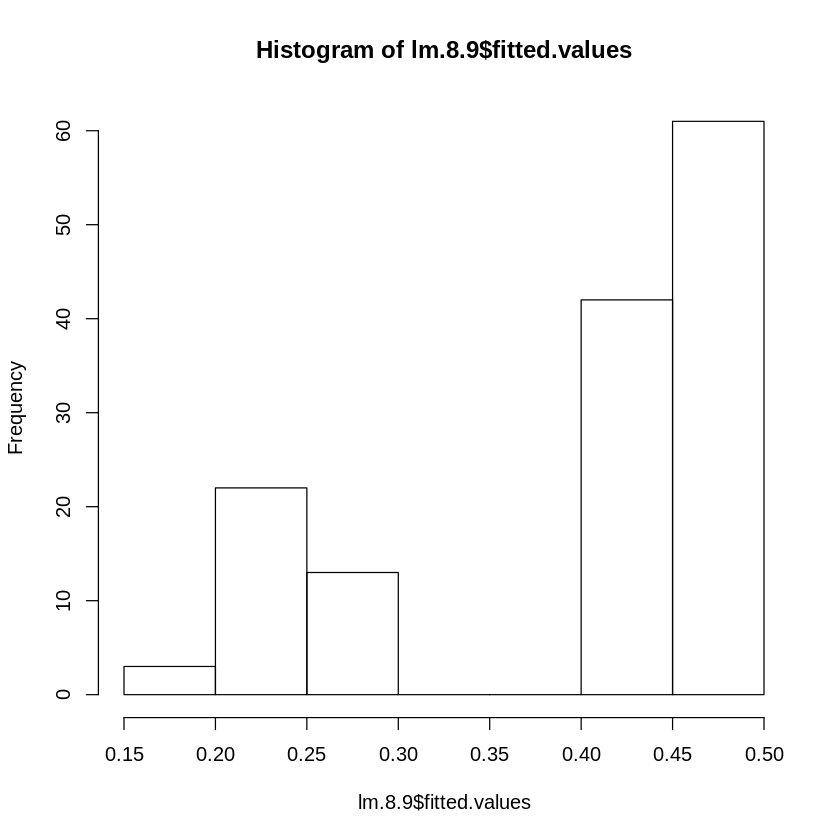

In [52]:
hist(lm.8.9$fitted.values) # Fitted values are neither negative nor above unity.

In [53]:
hhat <- lm.8.9$fitted.values * (1 - lm.8.9$fitted.values) # Calculate hhat (h = yhat * (1 - yhat))
lm.8.9wls <- lm(PC ~ hsGPA + ACT + parcoll, weights = 1 / hhat, data = gpa1)
summary(lm.8.9wls)


Call:
lm(formula = PC ~ hsGPA + ACT + parcoll, data = gpa1, weights = 1/hhat)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.0015 -0.9029 -0.5576  1.0800  2.0429 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.026210   0.476650   0.055   0.9562  
hsGPA       0.032703   0.129882   0.252   0.8016  
ACT         0.004272   0.015453   0.276   0.7826  
parcoll     0.215186   0.086292   2.494   0.0138 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.016 on 137 degrees of freedom
Multiple R-squared:  0.04644,	Adjusted R-squared:  0.02556 
F-statistic: 2.224 on 3 and 137 DF,  p-value: 0.08816


# CH08C12

In [3]:
data("meap00_01")

In [5]:
model_math4 = lm(math4~lunch+lenroll + lexppp, data = meap00_01)

In [11]:
model_math4_robust = coeftest(model_math4, vcov = vcovHC(model_math4, "HC1"))

In [12]:
stargazer(type = "text",
          model_math4, 
          model_math4_robust,  
          single.row = TRUE, 
          header = TRUE, #c('OLS','GLS'), 
          digits=5)


                                   Dependent variable:                
                    --------------------------------------------------
                               math4                                  
                                OLS                  coefficient      
                                                         test         
                                (1)                      (2)          
----------------------------------------------------------------------
lunch                  -0.44874*** (0.01464)    -0.44874*** (0.01658) 
lenroll                -5.39915*** (0.94041)    -5.39915*** (1.13117) 
lexppp                  3.52474* (2.09785)        3.52474 (2.35374)   
Constant              91.93246*** (19.96170)    91.93246*** (23.08710)
----------------------------------------------------------------------
Observations                   1,692                                  
R2                            0.37289                                 
Adjus

In [21]:
math4_hat = predict(model_math4)
math4_hat_sq = math4_hat^2

In [19]:
u_hat = resid(model_math4)

In [20]:
u_hat_sq = u_hat^2

In [23]:
model_math_whitetest = lm(u_hat_sq~math4_hat+math4_hat_sq )

In [24]:
stargazer(type = "text",
          model_math_whitetest, 
          single.row = TRUE, 
          header = TRUE, #c('OLS','GLS'), 
          digits=5)


                        Dependent variable:    
                    ---------------------------
                             u_hat_sq          
-----------------------------------------------
math4_hat             -28.29903*** (9.21685)   
math4_hat_sq            0.11553* (0.06591)     
Constant            1,664.12800*** (315.21440) 
-----------------------------------------------
Observations                   1,692           
R2                            0.13581          
Adjusted R2                   0.13478          
Residual Std. Error    365.09270 (df = 1689)   
F Statistic         132.71000*** (df = 2; 1689)
Note:               *p<0.1; **p<0.05; ***p<0.01


In [26]:
(whitetest_f =linearHypothesis(model_math_whitetest,
                c("math4_hat =0",
                 "math4_hat_sq =0")))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1691,260509863,NA,NA,NA,NA
1689,225131318,2,35378545,132.71,2.941828e-54


In [27]:
model_logu_hat_sq =  lm(log(u_hat_sq)~ math4_hat+math4_hat_sq)

In [28]:
log_u_hat_sq_fitted = predict(model_logu_hat_sq)

In [29]:
h_hat = exp(log_u_hat_sq_fitted)

In [30]:
model_math4_gls = lm(math4 ~ lunch+lenroll + lexppp, data = meap00_01, weight = 1/h_hat)

In [32]:
stargazer(type = "text",
          model_math4,
          model_math4_gls, 
          model_math4_robust,
          single.row = TRUE, 
          header = TRUE, #c('OLS','GLS'), 
          digits=5)


                                                        Dependent variable:                         
                                --------------------------------------------------------------------
                                                    math4                                           
                                                     OLS                           coefficient      
                                                                                       test         
                                         (1)                    (2)                    (3)          
----------------------------------------------------------------------------------------------------
lunch                           -0.44874*** (0.01464)  -0.44859*** (0.01461)  -0.44874*** (0.01658) 
lenroll                         -5.39915*** (0.94041)  -2.64728*** (0.83594)  -5.39915*** (1.13117) 
lexppp                            3.52474* (2.09785)    6.47419*** (1.68588)    3.52474 (2

In [33]:
model_math4_gls_robust = coeftest(model_math4_gls, vcov = vcovHC(model_math4_gls, "HC1"))

In [34]:
stargazer(type = "text",
          model_math4,
          model_math4_robust,
          model_math4_gls, 
          model_math4_gls_robust,
          
          single.row = TRUE, 
          header = TRUE, #c('OLS','GLS'), 
          digits=5)


                                                                    Dependent variable:                                    
                                -------------------------------------------------------------------------------------------
                                        math4                                         math4                                
                                         OLS                coefficient                OLS                coefficient      
                                                                test                                          test         
                                         (1)                    (2)                    (3)                    (4)          
---------------------------------------------------------------------------------------------------------------------------
lunch                           -0.44874*** (0.01464)  -0.44874*** (0.01658)  -0.44859*** (0.01461)  -0.44859*** (0.01425) 
lenroll

In [19]:
library(foreign)
smoke <- read.dta("http://fmwww.bc.edu/ec-p/data/wooldridge/smoke.dta")

# OLS
olsreg<-lm(cigs~log(income)+log(cigpric)+educ+age+I(age^2)+restaurn, 
                                                            data=smoke)
olsreg





Call:
lm(formula = cigs ~ log(income) + log(cigpric) + educ + age + 
    I(age^2) + restaurn, data = smoke)

Coefficients:
 (Intercept)   log(income)  log(cigpric)          educ           age  
   -3.639826      0.880268     -0.750862     -0.501498      0.770694  
    I(age^2)      restaurn  
   -0.009023     -2.825085  


In [21]:
# BP test
library(lmtest)
bptest(olsreg)

# FGLS: estimation of the variance function
logu2 <- log(resid(olsreg)^2)
varreg<-lm(logu2~log(income)+log(cigpric)+educ+age+I(age^2)+restaurn, 
                                                            data=smoke)

# FGLS: WLS
w <- 1/exp(fitted(varreg))
FGLS1=lm(cigs~log(income)+log(cigpric)+educ+age+I(age^2)+restaurn, 
                                                  weight=w ,data=smoke)
FGLS1


	studentized Breusch-Pagan test

data:  olsreg
BP = 32.258, df = 6, p-value = 1.456e-05



Call:
lm(formula = cigs ~ log(income) + log(cigpric) + educ + age + 
    I(age^2) + restaurn, data = smoke, weights = w)

Coefficients:
 (Intercept)   log(income)  log(cigpric)          educ           age  
    5.635463      1.295239     -2.940312     -0.463446      0.481948  
    I(age^2)      restaurn  
   -0.005627     -3.461064  


In [23]:
stargazer(type = "text",
          olsreg, 
          FGLS1,  
          single.row = TRUE, header = FALSE, digits=5)


                                           Dependent variable:            
                               -------------------------------------------
                                                  cigs                    
                                        (1)                   (2)         
--------------------------------------------------------------------------
log(income)                      0.88027 (0.72778)   1.29524*** (0.43701) 
log(cigpric)                    -0.75086 (5.77334)    -2.94031 (4.46014)  
educ                           -0.50150*** (0.16708) -0.46345*** (0.12016)
age                            0.77069*** (0.16012)  0.48195*** (0.09681) 
I(age2)                        -0.00902*** (0.00174) -0.00563*** (0.00094)
restaurn                       -2.82508** (1.11179)  -3.46106*** (0.79551)
Constant                        -3.63983 (24.07866)   5.63546 (17.80314)  
--------------------------------------------------------------------------
Observations            


Computer Exercises C4 (Ch 08)

https://college.cengage.com/geyser/wooldridge_9781337558860/computer_exercises/vote1_v4.xlsx


	state
 = state postal code
	district
 = congressional district
	democA
 = 1 if Candidate A is a Democrat, and = 0 otherwise
	voteA
 = percent vote for Candidate A
	expendA
 = campaign expenditures by Candidate A, in thousands of dollars
	expendB
 = campaign expenditures by Candidate B, in thousands of dollars
	prtystrA
 = percent of the most recent presidential vote that went to Candidate A's party
	lexpendA
 = log(expendA)
	lexpendB
 = log(expendB)
	shareA
 = Candidate A's spending as a percentage of total spending in the congressional campaign, 100×(expendAexpendA+expendB)

In [3]:
download.file("https://college.cengage.com/geyser/wooldridge_9781337558860/computer_exercises/vote1_v4.xlsx",
             "vote1_v4.xlsx")

In [5]:
vote1_v4 = readxl::read_excel("vote1_v4.xlsx")

In [6]:
glimpse(vote1_v4)

Observations: 164
Variables: 10
$ state    <chr> "\"KY\"", "\"NJ\"", "\"NY\"", "\"NM\"", "\"RI\"", "\"FL\"", …
$ district <dbl> 7, 4, 22, 1, 1, 4, 6, 3, 1, 4, 4, 4, 1, 21, 3, 10, 23, 1, 6,…
$ democA   <dbl> 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, …
$ voteA    <dbl> 59, 34, 29, 49, 44, 50, 32, 71, 35, 28, 48, 69, 39, 53, 69, …
$ expendA  <dbl> 411.70, 53.96, 10.43, 576.68, 801.29, 313.42, 37.62, 638.69,…
$ expendB  <dbl> 432.40, 252.82, 411.06, 559.13, 385.40, 1069.70, 288.17, 7.7…
$ prtystrA <dbl> 55, 45, 43, 46, 58, 36, 50, 49, 54, 46, 68, 46, 52, 54, 64, …
$ lexpendA <dbl> 6.0202920, 3.9883170, 2.3443980, 6.3572820, 6.6862220, 5.747…
$ lexpendB <dbl> 6.0693580, 5.5326900, 6.0187300, 6.3263890, 5.9542870, 6.975…
$ shareA   <dbl> 48.77, 17.59, 2.47, 50.77, 67.52, 22.66, 11.55, 98.81, 16.94…


In [ ]:
vote1_v4 _m = lm(voteA~, data = vote1_v4)